In [1]:
import pandas as pd
import numpy as np


In [2]:
admissions=pd.read_csv('readmission/admissions_202208161605.csv')
cptevents=pd.read_csv('readmission/cptevents_202208161605.csv')
d_labitems=pd.read_csv('readmission/d_labitems_202208161605.csv')
diagnoses_icd=pd.read_csv('readmission/diagnoses_icd_202208161605.csv')
drgcodes=pd.read_csv('readmission/drgcodes_202208161605.csv')
labevents=pd.read_csv('readmission/labevents_202208161605.csv')
patients=pd.read_csv('readmission/patients_202208161605.csv')
procedures_icd=pd.read_csv('readmission/procedures_icd_202208161605.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_23464\198207405.py:2: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  cptevents=pd.read_csv('readmission/cptevents_202208161605.csv')


In [3]:
heart_failure_icd9 = [
    '39891','40201','40211','40291','40401','40403','40411','40413',
    '40491','40493','4280','4281','42820','42821','42822','42823',
    '42830','42831','42832','42833','42840','42841','42842','42843','4289'
]

In [4]:
hf_diagnoses = diagnoses_icd[diagnoses_icd['icd9_code'].isin(heart_failure_icd9)]


In [5]:
hf_admissions = pd.merge(hf_diagnoses, admissions, on='hadm_id', how='inner')


In [6]:
hf_admissions.head()

,row_id_x,subject_id_x,hadm_id,seq_num,icd9_code,row_id_y,subject_id_y,admittime,dischtime,deathtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,1511,115,114585,10.0,4280,157,115,2194-10-16 12:48:00.000,2194-11-13 16:50:00.000,NaN,...,Medicare,NaN,UNOBTAINABLE,SINGLE,WHITE,NaN,NaN,ADRENAL INSUFFICIENCY,0,1
1,1527,117,140784,5.0,4280,159,117,2133-04-07 16:29:00.000,2133-04-12 16:39:00.000,NaN,...,Medicaid,NaN,CATHOLIC,SINGLE,WHITE,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1
2,1610,124,138376,12.0,42833,169,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
3,1613,124,138376,15.0,4280,169,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
4,1671,130,198214,2.0,4280,175,130,2119-10-29 14:49:00.000,2119-11-05 17:00:00.000,NaN,...,Private,NaN,CATHOLIC,SINGLE,WHITE,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1


In [ ]:
hf_admissions

In [7]:
print(len(hf_admissions['subject_id_x'].unique()))

10436


In [8]:
hf_admissions = hf_admissions.drop(['row_id_x', 'subject_id_x', 'row_id_y','ethnicity','marital_status','religion','language'], axis=1)


In [9]:
hf_admissions = hf_admissions.rename(columns={'subject_id_y': 'subject_id'})


In [10]:
hf_admissions.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,114585,10.0,4280,115,2194-10-16 12:48:00.000,2194-11-13 16:50:00.000,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,NaN,ADRENAL INSUFFICIENCY,0,1
1,140784,5.0,4280,117,2133-04-07 16:29:00.000,2133-04-12 16:39:00.000,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1
2,138376,12.0,42833,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
3,138376,15.0,4280,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
4,198214,2.0,4280,130,2119-10-29 14:49:00.000,2119-11-05 17:00:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1


In [11]:

hf_admissions['admittime'] = pd.to_datetime(hf_admissions['admittime'])
hf_admissions['dischtime'] = pd.to_datetime(hf_admissions['dischtime'])
hf_admissions['next_admit'] = hf_admissions.groupby('subject_id')['admittime'].shift(-1)
hf_admissions['days_to_readmit'] = (hf_admissions['next_admit'] - hf_admissions['dischtime']).dt.days
hf_admissions.loc[hf_admissions['days_to_readmit'] <= 0, 'days_to_readmit'] = pd.NA
hf_admissions['readmitted_30'] = hf_admissions['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x <= 30 else 0)


In [12]:
hf_admissions

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21269,109999,15.0,4280,97144,2187-02-07 14:00:00,2187-02-27 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,NaN,NaN,AORTIC STENOSIS\Transcatheter Aortic Valve Imp...,0,1,NaT,NaN,0
21270,133092,5.0,42833,97172,2174-09-07 18:40:00,2174-09-14 19:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOSPICE-HOME,Medicare,2174-09-07 15:06:00.000,2174-09-07 20:21:00.000,LOWER GI BLEED,0,1,2174-09-07 18:40:00,NaN,0
21271,133092,9.0,4280,97172,2174-09-07 18:40:00,2174-09-14 19:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOSPICE-HOME,Medicare,2174-09-07 15:06:00.000,2174-09-07 20:21:00.000,LOWER GI BLEED,0,1,NaT,NaN,0
21272,152542,7.0,4280,97488,2128-04-08 20:58:00,2128-04-13 16:27:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,2128-04-08 19:57:00.000,2128-04-08 21:15:00.000,PERIRECTAL ABSCESS,0,1,2128-08-27 15:01:00,135.0,0


In [13]:
hf_admissions['days_to_readmit'].unique()

array([      nan, 1.678e+03, 1.860e+03, 4.380e+02, 7.100e+01, 5.250e+02,
       1.569e+03, 3.780e+02, 7.760e+02, 2.030e+02, 2.869e+03, 5.300e+01,
       3.540e+02, 6.160e+02, 1.700e+01, 5.900e+01, 1.228e+03, 9.600e+01,
       4.600e+01, 6.060e+02, 2.890e+02, 4.200e+01, 3.920e+02, 1.127e+03,
       1.151e+03, 9.200e+01, 7.000e+00, 1.220e+02, 1.400e+01, 1.600e+02,
       1.720e+02, 5.500e+01, 1.833e+03, 5.310e+02, 2.380e+02, 2.432e+03,
       3.500e+01, 5.000e+00, 2.500e+01, 1.054e+03, 1.248e+03, 3.000e+00,
       7.140e+02, 4.700e+02, 4.260e+02, 1.960e+02, 8.670e+02, 4.000e+00,
       1.570e+03, 1.920e+02, 5.700e+02, 4.500e+01, 2.554e+03, 2.000e+00,
       1.800e+01, 9.100e+01, 6.390e+02, 1.577e+03, 6.000e+00, 1.777e+03,
       7.200e+01, 1.650e+02, 7.720e+02, 9.000e+00, 1.045e+03, 2.260e+02,
       3.690e+02, 6.880e+02, 7.600e+01, 1.670e+02, 2.203e+03, 7.870e+02,
       2.090e+02, 1.114e+03, 3.590e+02, 5.060e+02, 1.070e+02, 1.619e+03,
       3.000e+01, 3.630e+02, 1.339e+03, 1.200e+01, 

In [14]:
drg_agg = drgcodes.groupby('hadm_id').agg({
    'drg_code': lambda x: ','.join(x.dropna().astype(str)),
    'description': lambda x: '; '.join(x.dropna().unique())
}).reset_index()


In [15]:
merged_df= hf_admissions.merge(drg_agg, on='hadm_id', how='left')


In [16]:
merged_df.shape

(21274, 21)

In [17]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,234,249,F,2075-03-13 00:00:00.000,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00.000,2188-11-22 00:00:00.000,2188-11-22 00:00:00.000,NaN,1
2,236,251,M,2090-03-15 00:00:00.000,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00.000,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00.000,NaN,NaN,NaN,0


In [18]:
patients_new = patients[['subject_id', 'gender','expire_flag']]


In [19]:
patients_new.head()

,subject_id,gender,expire_flag
0,249,F,0
1,250,F,1
2,251,M,0
3,252,M,0
4,253,F,0


In [20]:
labevents_new=labevents[['subject_id','itemid','charttime','value','valuenum','valueuom','flag']]

In [21]:
labevents_new.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal


In [22]:
labevents_new.shape

(27854055, 7)

In [23]:
hf_diagnoses.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
51,1511,115,114585,10.0,4280
67,1527,117,140784,5.0,4280
150,1610,124,138376,12.0,42833
153,1613,124,138376,15.0,4280
211,1671,130,198214,2.0,4280


In [24]:
labevents.shape

(27854055, 9)

In [25]:
print(len(hf_diagnoses['subject_id'].unique()))

10436


In [26]:
admissions.shape

(58976, 19)

In [27]:
hf_diagnoses_1 = hf_diagnoses.drop(['row_id','seq_num'],axis=1)

In [28]:
hf_diagnoses_1.head()

,subject_id,hadm_id,icd9_code
51,115,114585,4280
67,117,140784,4280
150,124,138376,42833
153,124,138376,4280
211,130,198214,4280


In [29]:
lab_events_filtered = labevents_new[labevents_new['subject_id'].isin(hf_diagnoses_1['subject_id'])]


In [30]:
lab_events_filtered.shape

(10778204, 7)

In [31]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal


In [32]:
d_labitems.head()

,row_id,itemid,label,fluid,category,loinc_code
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [33]:
lab_events_filtered= pd.merge(lab_events_filtered, d_labitems, on='itemid', how='left')

In [34]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,row_id,label,fluid,category,loinc_code
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,21,pH,Blood,Blood Gas,11558-4
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,1,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,3,Base Excess,Blood,Blood Gas,11555-0
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,5,Calculated Total CO2,Blood,Blood Gas,34728-6
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,9,Free Calcium,Blood,Blood Gas,1994-3


In [35]:
lab_events_filtered=lab_events_filtered.drop(['row_id'],axis=1)

In [36]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3


In [37]:
lab_events_filtered=pd.merge(lab_events_filtered, patients_new, on='subject_id', how='left')

In [38]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [39]:
lab_events_filtered.shape

(10778204, 13)

In [40]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [41]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [42]:
lab_events_filtered=lab_events_filtered.drop(['itemid'],axis=1)

In [43]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [44]:
merged_df.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0,191,"PANCREAS, LIVER & SHUNT PROCEDURES WITH COMPLI..."
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0,107,CORONARY BYPASS WITH CARDIAC CATHETER


In [45]:
print(len(merged_df['hadm_id'].unique()))

14040


In [46]:
merged_df[merged_df.duplicated(subset='hadm_id', keep=False)].sort_values('hadm_id').head(10)


,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
15424,100018,14.0,4280,58128,2176-08-29 10:30:00,2176-09-06 17:13:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,...,NaN,NaN,HERNIATED DISC/SDA,0,1,2177-05-28 21:20:00,264.0,0,"234,234,28",Spinal Procedures; SPINAL PROCEDURES W MCC
15423,100018,4.0,42833,58128,2176-08-29 10:30:00,2176-09-06 17:13:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,...,NaN,NaN,HERNIATED DISC/SDA,0,1,2176-08-29 10:30:00,NaN,0,"234,234,28",Spinal Procedures; SPINAL PROCEDURES W MCC
14652,100035,26.0,4280,48539,2115-02-22 06:51:00,2115-03-19 14:37:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,...,2115-02-22 06:24:00.000,2115-02-22 09:14:00.000,POST ARREST,0,1,NaT,NaN,0,"1214,1214,166",Other Respiratory & Chest Procedures; OTHER RE...
14651,100035,11.0,42822,48539,2115-02-22 06:51:00,2115-03-19 14:37:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,...,2115-02-22 06:24:00.000,2115-02-22 09:14:00.000,POST ARREST,0,1,2115-02-22 06:51:00,NaN,0,"1214,1214,166",Other Respiratory & Chest Procedures; OTHER RE...
12343,100036,2.0,42833,30078,2187-07-13 13:58:00,2187-07-23 15:45:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,NaN,CHF,0,1,2187-07-13 13:58:00,NaN,0,"1633,1633,219",Cardiac Valve Procedures w/o Cardiac Catheteri...
12344,100036,6.0,4280,30078,2187-07-13 13:58:00,2187-07-23 15:45:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,NaN,CHF,0,1,NaT,NaN,0,"1633,1633,219",Cardiac Valve Procedures w/o Cardiac Catheteri...
15229,100039,16.0,4280,53014,2174-04-18 23:16:00,2174-05-17 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,2174-04-18 15:10:00.000,2174-04-19 00:02:00.000,ABDOMINAL PAIN,0,1,2172-10-15 19:06:00,NaN,0,"2514,2514,391","Abdominal Pain; ESOPHAGITIS, GASTROENT & MISC ..."
15228,100039,2.0,42843,53014,2174-04-18 23:16:00,2174-05-17 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,2174-04-18 15:10:00.000,2174-04-19 00:02:00.000,ABDOMINAL PAIN,0,1,2174-04-18 23:16:00,NaN,0,"2514,2514,391","Abdominal Pain; ESOPHAGITIS, GASTROENT & MISC ..."
4306,100061,1.0,42833,11728,2178-12-25 14:11:00,2178-12-27 11:45:00,2178-12-27 11:45:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,CONGESTIVE HEART FAILURE;COPD,1,1,2178-12-25 14:11:00,NaN,0,"1943,1943,292",Heart Failure; HEART FAILURE & SHOCK W CC
4307,100061,4.0,4280,11728,2178-12-25 14:11:00,2178-12-27 11:45:00,2178-12-27 11:45:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,CONGESTIVE HEART FAILURE;COPD,1,1,2178-09-03 23:49:00,NaN,0,"1943,1943,292",Heart Failure; HEART FAILURE & SHOCK W CC


In [47]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [48]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [49]:
print(lab_events_filtered['charttime'].isna().sum())
print(f"Total rows: {len(lab_events_filtered)}")


0
Total rows: 10778204


In [50]:
merged_df_1=merged_df

In [51]:
lab_events_filtered_1=lab_events_filtered

In [52]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [53]:
merged_df_1.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0,191,"PANCREAS, LIVER & SHUNT PROCEDURES WITH COMPLI..."
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0,107,CORONARY BYPASS WITH CARDIAC CATHETER


In [54]:
lab_events_filtered = lab_events_filtered[[
    'subject_id', 'charttime', 'valuenum', 'label', 'flag'
]]

In [55]:
merged_df = merged_df[[
    'hadm_id', 'subject_id', 'admittime', 'dischtime', 
    'admission_type', 'admission_location', 'discharge_location',
    'insurance', 'diagnosis', 'hospital_expire_flag', 
    'readmitted_30', 'days_to_readmit'
]]

In [56]:
merged_df.head()

,hadm_id,subject_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
0,114585,115,2194-10-16 12:48:00,2194-11-13 16:50:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,ADRENAL INSUFFICIENCY,0,0,NaN
1,140784,117,2133-04-07 16:29:00,2133-04-12 16:39:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,LIVER FAILURE;S/P TIPS,0,0,NaN
2,138376,124,2165-12-31 18:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,0,NaN
3,138376,124,2165-12-31 18:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,0,NaN
4,198214,130,2119-10-29 14:49:00,2119-11-05 17:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,0,NaN


In [57]:
print(len(merged_df))

21274


In [58]:
lab_events_filtered.head()

,subject_id,charttime,valuenum,label,flag
0,3,2101-10-12 16:07:00.000,7.39,pH,NaN
1,3,2101-10-12 18:17:00.000,NaN,SPECIMEN TYPE,NaN
2,3,2101-10-12 18:17:00.000,-1.00,Base Excess,NaN
3,3,2101-10-12 18:17:00.000,22.00,Calculated Total CO2,NaN
4,3,2101-10-12 18:17:00.000,0.93,Free Calcium,abnormal


In [59]:
lab_events_filtered['label'].unique()

array(['pH', 'SPECIMEN TYPE', 'Base Excess', 'Calculated Total CO2',
       'Free Calcium', 'Intubated', 'Lactate', 'pCO2', 'pO2',
       'Temperature', 'Anion Gap', 'Bicarbonate', 'Calcium, Total',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Sodium', 'Urea Nitrogen', 'Vancomycin', 'Hematocrit',
       'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Creatine Kinase (CK)',
       'Anisocytosis', 'Basophils', 'Eosinophils', 'Hemoglobin',
       'Hypochromia', 'Lymphocytes', 'Macrocytes', 'MCH', 'MCHC', 'MCV',
       'Microcytes', 'Monocytes', 'Neutrophils', 'Platelet Count',
       'Poikilocytosis', 'RDW', 'Red Blood Cell Fragments',
       'Red Blood Cells', 'White Blood Cells', 'Bilirubin', 'Blood',
       'Ketone', 'Leukocytes', 'Nitrite', 'Protein', 'Specific Gravity',
       'Urine Appearance', 'Urine Color', 'Urobilinogen', 'Bacteria',
       'Epithelial Cells', 'Hyaline Casts', 'RBC', 'Urine Mucous', 'WBC'

In [ ]:
hf_critical_labs = [
    'BNP', 'NTproBNP', 'Troponin', 'Creatinine', 'Sodium', 'Potassium',
    'Urea Nitrogen', 'BUN', 'Hemoglobin', 'Hematocrit', 'Albumin',
    'Glucose', 'Magnesium', 'Chloride', 'AST', 'ALT', 'Bilirubin',
    'C-Reactive Protein', 'CRP', 'D-Dimer', 'pH', 'pCO2', 'Lactate'
]

hf_critical_labs_lower = [x.lower() for x in hf_critical_labs]

filtered = lab_events_filtered[
    lab_events_filtered['label'].str.lower().isin(hf_critical_labs_lower)
].copy()


In [87]:
print(len(filtered['label'].unique()))

17


In [88]:
filtered.shape

(3573750, 6)

In [89]:
filtered.head()

,subject_id,charttime,valuenum,label,flag,label_lower
0,3,2101-10-12 16:07:00.000,7.39,pH,NaN,ph
6,3,2101-10-12 18:17:00.000,1.80,Lactate,NaN,lactate
7,3,2101-10-12 18:17:00.000,33.00,pCO2,NaN,pco2
8,3,2101-10-12 18:17:00.000,7.42,pH,NaN,ph
14,3,2101-10-13 03:00:00.000,109.00,Chloride,NaN,chloride


In [ ]:
filtered['label'] = filtered['label'].str.lower() 
lab_wide = filtered.pivot_table(
    index=['subject_id', 'charttime'],
    columns='label',
    values='valuenum',
    aggfunc='first'
).reset_index()

print(f"Resulting dataset shape: {lab_wide.shape}")
print(lab_wide.head())

Resulting dataset shape: (678580, 18)
label  subject_id                charttime  albumin  c-reactive protein  \
0               3  2101-10-04 15:24:00.000      NaN                 NaN   
1               3  2101-10-05 06:00:00.000      2.8                 NaN   
2               3  2101-10-06 05:45:00.000      NaN                 NaN   
3               3  2101-10-07 04:30:00.000      NaN                 NaN   
4               3  2101-10-11 19:10:00.000      NaN                 NaN   

label  chloride  creatinine  d-dimer  glucose  hematocrit  hemoglobin  \
0         103.0         1.7      NaN    121.0        33.0        11.5   
1         103.0         1.6      NaN    116.0        33.4        11.0   
2         104.0         1.8      NaN     94.0        33.1        10.9   
3         101.0         1.8      NaN     92.0        32.0        10.6   
4         104.0         2.1      NaN    145.0        28.6         9.7   

label  lactate  magnesium  ntprobnp  pco2  ph  potassium  sodium  \
0   

In [ ]:
flag_wide = filtered.pivot_table(
    index=['subject_id', 'charttime'],
    columns='label',
    values='flag',
    aggfunc='first'
).reset_index()

flag_wide.columns = ['subject_id', 'charttime'] + [f"{col}_flag" for col in flag_wide.columns[2:]]

print(f"Resulting dataset shape for flags: {flag_wide.shape}")
print(flag_wide.head())

lab_wide['charttime'] = pd.to_datetime(lab_wide['charttime'])
flag_wide['charttime'] = pd.to_datetime(flag_wide['charttime'])

final_df = lab_wide.merge(flag_wide, on=['subject_id', 'charttime'], how='left')

print(f"Final merged dataset shape: {final_df.shape}")
print(final_df.head())


Resulting dataset shape for flags: (554233, 18)
   subject_id                charttime albumin_flag c-reactive protein_flag  \
0           3  2101-10-04 15:24:00.000          NaN                     NaN   
1           3  2101-10-05 06:00:00.000     abnormal                     NaN   
2           3  2101-10-06 05:45:00.000          NaN                     NaN   
3           3  2101-10-07 04:30:00.000          NaN                     NaN   
4           3  2101-10-11 19:10:00.000          NaN                     NaN   

  chloride_flag creatinine_flag d-dimer_flag glucose_flag hematocrit_flag  \
0           NaN        abnormal          NaN     abnormal        abnormal   
1           NaN        abnormal          NaN     abnormal        abnormal   
2           NaN        abnormal          NaN          NaN        abnormal   
3           NaN        abnormal          NaN          NaN        abnormal   
4           NaN        abnormal          NaN     abnormal        abnormal   

  hemoglobin_f

In [92]:
merged_df.head(1)

,hadm_id,subject_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
0,114585,115,2194-10-16 12:48:00,2194-11-13 16:50:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,ADRENAL INSUFFICIENCY,0,0,NaN


In [ ]:

final_df['charttime'] = pd.to_datetime(final_df['charttime'])
90/0me00.-+[rged_df['admittime'] = pd.to_datetime(merged_df['admittime'])
merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'])

merged_data = pd.merge_asof(
    final_df.sort_values('charttime'),
    merged_df.sort_values('admittime'),
    left_on='charttime',
    right_on='admittime',
    by='subject_id',
    direction='backward',
    tolerance=pd.Timedelta('30D')  
)

merged_data = merged_data[
    (merged_data['charttime'] >= merged_data['admittime']) &
    (merged_data['charttime'] <= merged_data['dischtime'])
]


C:\Users\asus\AppData\Local\Temp\ipykernel_23464\3364037063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['admittime'] = pd.to_datetime(merged_df['admittime'])
C:\Users\asus\AppData\Local\Temp\ipykernel_23464\3364037063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'])


In [94]:
merged_data.head()

,subject_id,charttime,albumin,c-reactive protein,chloride,creatinine,d-dimer,glucose,hematocrit,hemoglobin,...,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
250,9319,2100-07-01 13:27:00,NaN,NaN,NaN,NaN,NaN,80.0,NaN,9.9,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
251,9319,2100-07-01 16:15:00,NaN,NaN,100.0,1.0,NaN,114.0,29.2,9.7,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
253,9319,2100-07-02 05:13:00,NaN,NaN,103.0,1.3,NaN,157.0,26.3,9.0,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
260,31585,2100-07-02 22:10:00,NaN,NaN,104.0,1.1,NaN,127.0,NaN,NaN,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN
261,31585,2100-07-02 22:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN


In [95]:
merged_data.shape

(441826, 45)

In [96]:
print(merged_data.columns.tolist())

['subject_id', 'charttime', 'albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit']


In [97]:
cols_to_check = [
    'albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose',
    'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph',
    'potassium', 'sodium', 'urea nitrogen'
]

missing_percent = merged_data[cols_to_check].isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


c-reactive protein    99.829797
d-dimer               99.793358
ntprobnp              99.649862
albumin               94.760833
lactate               89.039577
pco2                  65.231335
magnesium             59.779415
ph                    57.724534
urea nitrogen         57.599145
chloride              57.499559
creatinine            57.354026
hemoglobin            57.299254
sodium                57.073825
hematocrit            54.787179
potassium             54.209349
glucose               46.136941
dtype: float64


In [98]:
high_missing_cols = ['c-reactive protein', 'd-dimer', 'ntprobnp']
merged_data.drop(columns=high_missing_cols, inplace=True)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=5, max_depth=5),
                           max_iter=5, random_state=42)

cols_to_impute = [
    'albumin', 'lactate', 'pco2', 'magnesium', 'ph', 'urea nitrogen', 'chloride',
    'creatinine', 'hemoglobin', 'sodium', 'hematocrit', 'potassium', 'glucose'
]
imputed_data = merged_data.copy()

imputed_values = imputer.fit_transform(imputed_data[cols_to_impute])
imputed_data[cols_to_impute] = imputed_values


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [101]:
merged_data=imputed_data
merged_data.head()

,subject_id,charttime,albumin,chloride,creatinine,glucose,hematocrit,hemoglobin,lactate,magnesium,...,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
250,9319,2100-07-01 13:27:00,3.427993,102.608600,3.483028,80.000000,29.705262,9.900000,0.800000,2.084262,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
251,9319,2100-07-01 16:15:00,2.551165,100.000000,1.000000,114.000000,29.200000,9.700000,2.239407,1.600000,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
253,9319,2100-07-02 05:13:00,3.371434,103.000000,1.300000,157.000000,26.300000,9.000000,2.962385,2.200000,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
260,31585,2100-07-02 22:10:00,3.474349,104.000000,1.100000,127.000000,31.320366,10.685932,1.956851,1.886851,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN
261,31585,2100-07-02 22:17:00,2.233349,101.299579,3.483028,120.060808,29.705262,9.869304,1.500000,1.695092,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN


In [102]:
print(merged_data.columns.tolist())

['subject_id', 'charttime', 'albumin', 'chloride', 'creatinine', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit']


In [ ]:

merged_data_1 = pd.get_dummies(merged_data, columns=['admission_type', 'discharge_location'])

In [104]:
merged_data_1.head()

,subject_id,charttime,albumin,chloride,creatinine,glucose,hematocrit,hemoglobin,lactate,magnesium,...,discharge_location_HOME WITH HOME IV PROVIDR,discharge_location_HOSPICE-HOME,discharge_location_HOSPICE-MEDICAL FACILITY,discharge_location_ICF,discharge_location_LEFT AGAINST MEDICAL ADVI,discharge_location_LONG TERM CARE HOSPITAL,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF
250,9319,2100-07-01 13:27:00,3.427993,102.608600,3.483028,80.000000,29.705262,9.900000,0.800000,2.084262,...,False,False,False,False,False,False,False,False,False,False
251,9319,2100-07-01 16:15:00,2.551165,100.000000,1.000000,114.000000,29.200000,9.700000,2.239407,1.600000,...,False,False,False,False,False,False,False,False,False,False
253,9319,2100-07-02 05:13:00,3.371434,103.000000,1.300000,157.000000,26.300000,9.000000,2.962385,2.200000,...,False,False,False,False,False,False,False,False,False,False
260,31585,2100-07-02 22:10:00,3.474349,104.000000,1.100000,127.000000,31.320366,10.685932,1.956851,1.886851,...,False,False,False,False,False,False,False,False,False,True
261,31585,2100-07-02 22:17:00,2.233349,101.299579,3.483028,120.060808,29.705262,9.869304,1.500000,1.695092,...,False,False,False,False,False,False,False,False,False,True


In [105]:
merged_data['insurance'].unique()

array(['Medicare', 'Private', 'Medicaid', 'Government', 'Self Pay'],
      dtype=object)

In [106]:
insurance_risk = {
    'Medicare': 3,
    'Medicaid': 4,
    'Private': 1,
    'Self Pay': 2,
    'Government': 2
}
merged_data_1['insurance_risk'] = merged_data_1['insurance'].map(insurance_risk)

In [107]:
merged_data_1.head()

,subject_id,charttime,albumin,chloride,creatinine,glucose,hematocrit,hemoglobin,lactate,magnesium,...,discharge_location_HOSPICE-HOME,discharge_location_HOSPICE-MEDICAL FACILITY,discharge_location_ICF,discharge_location_LEFT AGAINST MEDICAL ADVI,discharge_location_LONG TERM CARE HOSPITAL,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,insurance_risk
250,9319,2100-07-01 13:27:00,3.427993,102.608600,3.483028,80.000000,29.705262,9.900000,0.800000,2.084262,...,False,False,False,False,False,False,False,False,False,3
251,9319,2100-07-01 16:15:00,2.551165,100.000000,1.000000,114.000000,29.200000,9.700000,2.239407,1.600000,...,False,False,False,False,False,False,False,False,False,3
253,9319,2100-07-02 05:13:00,3.371434,103.000000,1.300000,157.000000,26.300000,9.000000,2.962385,2.200000,...,False,False,False,False,False,False,False,False,False,3
260,31585,2100-07-02 22:10:00,3.474349,104.000000,1.100000,127.000000,31.320366,10.685932,1.956851,1.886851,...,False,False,False,False,False,False,False,False,True,1
261,31585,2100-07-02 22:17:00,2.233349,101.299579,3.483028,120.060808,29.705262,9.869304,1.500000,1.695092,...,False,False,False,False,False,False,False,False,True,1


In [108]:
print(len(merged_data_1['diagnosis'].unique()))

5168


In [109]:
print(merged_data_1.columns.tolist())

['subject_id', 'charttime', 'albumin', 'chloride', 'creatinine', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit', 'admission_type_ELECTIVE', 'admission_type_EMERGENCY', 'admission_type_NEWBORN', 'admission_type_URGENT', 'discharge_location_DEAD/EXPIRED', 'discharge_location_DISC-TRAN CANCER/CHLDRN H', 'discharge_location_DISC-TRAN TO FEDERAL HC', 'discharge_location_DISCH-TRAN TO PSYCH HOSP', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', 'discharge_location_HOME WITH HOME IV PROVIDR'

In [110]:
merged_data_1 = merged_data_1.drop('diagnosis', axis=1)

In [111]:
merged_data_1=merged_data_1.drop(['hadm_id','subject_id','charttime','hospital_expire_flag'],axis=1)

In [112]:
print(merged_data_1.columns.tolist())

['albumin', 'chloride', 'creatinine', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'admittime', 'dischtime', 'admission_location', 'insurance', 'readmitted_30', 'days_to_readmit', 'admission_type_ELECTIVE', 'admission_type_EMERGENCY', 'admission_type_NEWBORN', 'admission_type_URGENT', 'discharge_location_DEAD/EXPIRED', 'discharge_location_DISC-TRAN CANCER/CHLDRN H', 'discharge_location_DISC-TRAN TO FEDERAL HC', 'discharge_location_DISCH-TRAN TO PSYCH HOSP', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', 'discharge_location_HOME WITH HOME IV PROVIDR', 'discharge_location_HOSPICE-HOME', 'discharge_location_HOSPICE-MEDICAL FA

In [114]:
flag_columns = [
    'albumin_flag', 'creatinine_flag',
    'hematocrit_flag', 'hemoglobin_flag', 'magnesium_flag',
     'sodium_flag', 'urea nitrogen_flag','potassium_flag'
]

for col in flag_columns:
    if col in merged_data_1.columns:
        merged_data_1[col] = (
            merged_data_1[col]
            .astype(str)  
            .str.strip()  
            .replace({'abnormal': 1, 'delta': 2, 'nan': 0}) 
            .astype('int8')  
        )


In [115]:
merged_data_1['admittime'] = pd.to_datetime(merged_data_1['admittime'])
merged_data_1['dischtime'] = pd.to_datetime(merged_data_1['dischtime'])


merged_data_1['length_of_stay'] = (merged_data_1['dischtime'] - merged_data_1['admittime']).dt.days


merged_data_1['admit_weekday'] = merged_data_1['admittime'].dt.weekday


drop_cols = [
    'days_to_readmit', 
    'discharge_location_DEAD/EXPIRED',
    'admission_type_NEWBORN'
]
merged_data_1.drop(columns=drop_cols, inplace=True, errors='ignore')


if 'diagnosis' in merged_data_1.columns:
    merged_data_1= merged_data_1[merged_data_1['diagnosis'].str.contains('heart failure', case=False, na=False)]


selected_features = [
    
    'creatinine', 'creatinine_flag',
    'urea nitrogen', 'urea nitrogen_flag', 'sodium', 'sodium_flag',
    'potassium', 'potassium_flag', 'albumin', 'albumin_flag',
    'hemoglobin', 'hematocrit', 'hemoglobin_flag', 'hematocrit_flag',
    'magnesium', 'magnesium_flag',

   
    'admission_type_EMERGENCY', 'admission_type_URGENT',
    'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE',
    'discharge_location_SNF', 'discharge_location_SHORT TERM HOSPITAL',
    'discharge_location_REHAB/DISTINCT PART HOSP', 'discharge_location_OTHER FACILITY',

    
    'insurance_risk',
    'length_of_stay', 'admit_weekday'
]

target_column = 'readmitted_30'


model_df = merged_data_1[selected_features + [target_column]].copy()

In [116]:
model_df.head()

,creatinine,creatinine_flag,urea nitrogen,urea nitrogen_flag,sodium,sodium_flag,potassium,potassium_flag,albumin,albumin_flag,...,discharge_location_HOME,discharge_location_HOME HEALTH CARE,discharge_location_SNF,discharge_location_SHORT TERM HOSPITAL,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_OTHER FACILITY,insurance_risk,length_of_stay,admit_weekday,readmitted_30
250,3.483028,0,44.807113,0,138.404166,0,4.566212,0,3.427993,0,...,False,True,False,False,False,False,3,14,3,0.0
251,1.000000,0,28.000000,1,139.000000,0,3.600000,0,2.551165,0,...,False,True,False,False,False,False,3,14,3,0.0
253,1.300000,1,34.000000,1,138.000000,0,4.300000,0,3.371434,0,...,False,True,False,False,False,False,3,14,3,0.0
260,1.100000,0,12.000000,0,143.000000,0,3.400000,0,3.474349,0,...,False,False,True,False,False,False,1,4,4,0.0
261,3.483028,0,44.480959,0,136.616694,0,4.566212,0,2.233349,0,...,False,False,True,False,False,False,1,4,4,0.0


In [117]:
print(model_df.columns.tolist())

['creatinine', 'creatinine_flag', 'urea nitrogen', 'urea nitrogen_flag', 'sodium', 'sodium_flag', 'potassium', 'potassium_flag', 'albumin', 'albumin_flag', 'hemoglobin', 'hematocrit', 'hemoglobin_flag', 'hematocrit_flag', 'magnesium', 'magnesium_flag', 'admission_type_EMERGENCY', 'admission_type_URGENT', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', 'discharge_location_SNF', 'discharge_location_SHORT TERM HOSPITAL', 'discharge_location_REHAB/DISTINCT PART HOSP', 'discharge_location_OTHER FACILITY', 'insurance_risk', 'length_of_stay', 'admit_weekday', 'readmitted_30']


In [ ]:

readmission_counts = model_df['readmitted_30'].value_counts()

print(readmission_counts)


readmitted_30
0.0    432925
1.0      8901
Name: count, dtype: int64


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16000, number of negative: 16000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2168
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


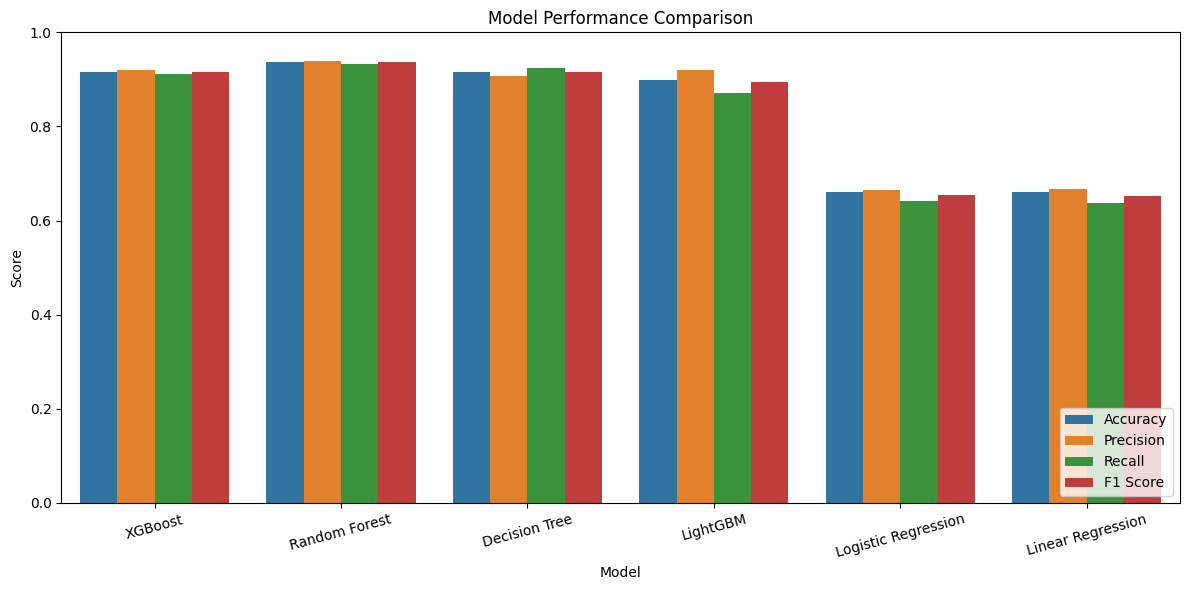

In [148]:

class_0 = model_df[model_df['readmitted_30'] == 0]
class_1 = model_df[model_df['readmitted_30'] == 1]
class_0_sample = class_0.sample(n=20000, random_state=42)
combined = pd.concat([class_0_sample, class_1], axis=0)

X = combined.drop(columns=['readmitted_30'])
y = combined['readmitted_30']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Linear Regression": LinearRegression()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if name == "Linear Regression":
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [149]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.916375,0.920050,0.91200,0.916008
1,Random Forest,0.936125,0.939310,0.93250,0.935893
2,Decision Tree,0.914875,0.907239,0.92425,0.915666
3,LightGBM,0.897625,0.919104,0.87200,0.894933
4,Logistic Regression,0.659625,0.665372,0.64225,0.653606
5,Linear Regression,0.660250,0.667626,0.63825,0.652607


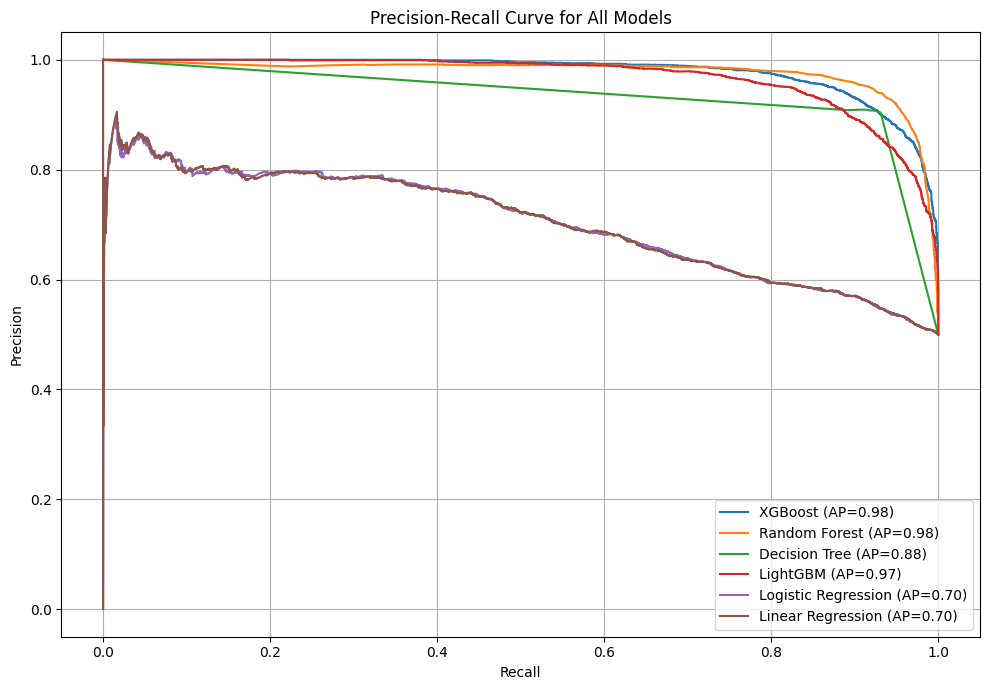

In [150]:
from sklearn.metrics import precision_recall_curve, average_precision_score
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if name == "Linear Regression":
        y_scores = model.predict(X_test)
    elif hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_prec = average_precision_score(y_test, y_scores)
    
    plt.plot(recall, precision, label=f"{name} (AP={avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [151]:
class_0 = model_df[model_df['readmitted_30'] == 0]
class_1 = model_df[model_df['readmitted_30'] == 1]

class_0_sample = class_0.sample(n=20000, random_state=42)

combined = pd.concat([class_0_sample, class_1], axis=0)


X = combined.drop(columns=['readmitted_30'])
y = combined['readmitted_30']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9361
Precision: 0.9393
Recall:    0.9325
F1 Score:  0.9359


In [153]:
import joblib
joblib.dump(model_1, "model.pkl")
model_1 = joblib.load("model.pkl")
